## Detecting and Treating Outliers | Treating the odd one out!

In [8]:
# https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

### Introduction:
One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.

### 1. What are Outliers? 
We all have heard of the idiom ‘odd one out which means something unusual in comparison to the others in a group.

Similarly, an Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

### 2. Why do they occur?
An outlier may occur due to the variability in the data, or due to experimental error/human error.

They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

### 3. What do they affect?
In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the data.

Mean is the accurate measure to describe the data when we do not have any outliers present.

Median is used if there is an outlier in the dataset.

Mode is used if there is an outlier AND about ½ or more of the data is the same.

‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.

#### Example:
Consider a small dataset, sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]. By looking at it, one can quickly say ‘101’ is an outlier that is much larger than the other values.

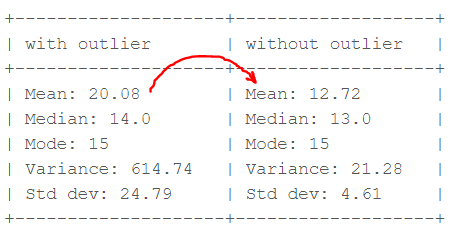

From the above calculations, we can clearly say the Mean is more affected than the Median.

### 4. Detecting Outliers
If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers

- Boxplots
- Z-score
- Inter Quantile Range(IQR)

#### 4.1 Detecting outliers using Boxplot:

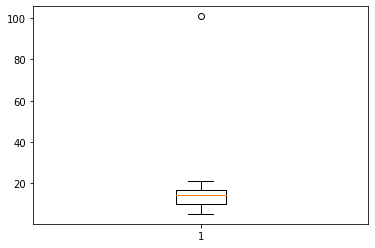

In [9]:
import matplotlib.pyplot as plt

sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

plt.boxplot(sample)
plt.show()

#### 4.2 Detecting outliers using the Z-scores
Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

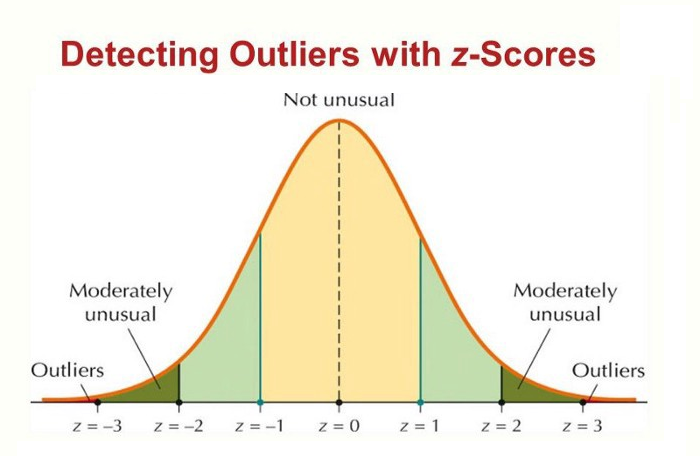

#### Steps:
    - loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.
    - define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.

In [10]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [101]


#### 4.3 Detecting outliers using the Inter Quantile Range(IQR)
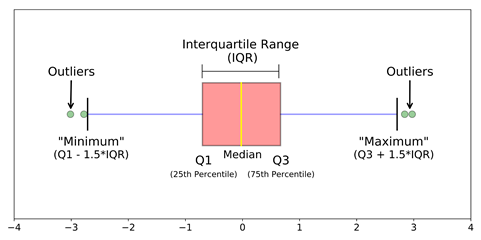

**Criteria**: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.  

**Steps**:
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
- loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [11]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101]


### 5. Handling Outliers
Till now we learned about detecting the outliers. The main question is how to deal with outliers?

Below are some of the methods of treating the outliers

- Trimming/removing the outlier
- Quantile based flooring and capping
- Mean/Median imputation

#### 5.1 Trimming/Remove the outliers
In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.

Python code to delete the outlier and copy the rest of the elements to another array.

In [12]:
# Trimming
for i in sample_outliers:
    a = np.delete(sample, sample.index(i))
print(a)
print(len(sample), len(a))

[15 18  7 13 16 11 21  5 15 10  9]
12 11


#### 5.2 Quantile based flooring and capping
In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.

Python code:

In [13]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("Sample:", sample)
print("New array:",b)

7.2 20.700000000000003
Sample: [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


The data points that are lesser than the 10th percentile are replaced with the 10th percentile value and the data points that are greater than the 90th percentile are replaced with 90th percentile value.

#### 5.3 Mean/Median imputation
As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

Python Code:

In [14]:
median = np.median(sample)# Replace with median
c = [i for i in sample]
for i in sample_outliers:
    c[sample.index(i)] = median
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
New array:  [15, 14.0, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]


### Summary:
We learned about an important phase of data preprocessing which is treating outliers. We now know different methods of detecting and treating outliers.